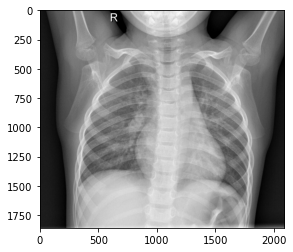

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = r"C:\Users\Advaith Nair\OneDrive\Desktop\Advaith\School\Grade XII\AI\Bootcamp\AI Assisted Medical Diagnosis\chest_xray\train"
CATEGORIES = ["NORMAL", "PNEUMONIA"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break



In [4]:
print(img_array.shape)

(1858, 2090)


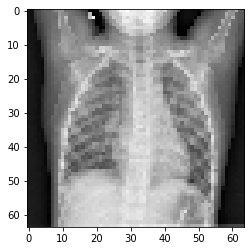

In [5]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
    

In [7]:
print(len(training_data))

5216


In [8]:

TESTDATADIR = r"C:\Users\Advaith Nair\OneDrive\Desktop\Advaith\School\Grade XII\AI\Bootcamp\AI Assisted Medical Diagnosis\chest_xray\test"
CATEGORIES = ["NORMAL", "PNEUMONIA"]
test_data = []
def create_test_data():
    for category in CATEGORIES:
            path = os.path.join(TESTDATADIR, category) 
            class_num = CATEGORIES.index(category)
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    test_data.append([new_array, class_num])
                except Exception as e:
                    pass
create_test_data()
    


In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
1
0
1


In [11]:
X = []
y = []

In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
y = np.array(y)
y_test = np.array(y_test)

In [15]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [17]:
X[1]

array([[[56],
        [29],
        [33],
        ...,
        [31],
        [35],
        [36]],

       [[57],
        [41],
        [36],
        ...,
        [43],
        [22],
        [ 8]],

       [[62],
        [31],
        [40],
        ...,
        [39],
        [20],
        [25]],

       ...,

       [[25],
        [36],
        [45],
        ...,
        [28],
        [31],
        [34]],

       [[24],
        [37],
        [44],
        ...,
        [26],
        [30],
        [34]],

       [[23],
        [38],
        [44],
        ...,
        [28],
        [31],
        [34]]], dtype=uint8)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X=X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

model.fit(X, y, batch_size=32, epochs = 10, validation_data= (X_test,y_test))

Epoch 1/10
163/163 [==============================] - 22s 133ms/step - loss: 0.2485 - accuracy: 0.8923 - val_loss: 108.8864 - val_accuracy: 0.7580
Epoch 2/10
163/163 [==============================] - 21s 128ms/step - loss: 0.1235 - accuracy: 0.9538 - val_loss: 262.8048 - val_accuracy: 0.6843
Epoch 3/10
163/163 [==============================] - 20s 125ms/step - loss: 0.0931 - accuracy: 0.9645 - val_loss: 189.3494 - val_accuracy: 0.7612
Epoch 4/10
163/163 [==============================] - 20s 121ms/step - loss: 0.0737 - accuracy: 0.9743 - val_loss: 228.8268 - val_accuracy: 0.7404
Epoch 5/10
163/163 [==============================] - 19s 114ms/step - loss: 0.0632 - accuracy: 0.9762 - val_loss: 131.0206 - val_accuracy: 0.7965
Epoch 6/10
163/163 [==============================] - 18s 111ms/step - loss: 0.0636 - accuracy: 0.9751 - val_loss: 207.6894 - val_accuracy: 0.7612
Epoch 7/10
163/163 [==============================] - 18s 113ms/step - loss: 0.0545 - accuracy: 0.9808 - val_loss: 155

In [26]:
model.save('CNN Pneumonia')


INFO:tensorflow:Assets written to: CNN Pneumonia\assets
